# Data Preprocessing

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/Cell_Lines_Details.xlsx
/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/GDSC_DATASET.csv
/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/GDSC2-dataset.csv
/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/Compounds-annotation.csv


In [ ]:
# Load the datasets
gdsc_dataset = pd.read_csv('/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/GDSC_DATASET.csv')
compounds_annotation = pd.read_csv('/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/Compounds-annotation.csv')
gdsc2_dataset = pd.read_csv('/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/GDSC2-dataset.csv')
cell_lines_details = pd.read_excel('/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/Cell_Lines_Details.xlsx')

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
display(gdsc_dataset.head())
display(compounds_annotation.head())
display(gdsc2_dataset.head())
display(cell_lines_details.head())

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
0,1,MGH,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,MGH,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,MGH,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,MGH,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MGH,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [ ]:
gdsc2_subset = gdsc2_dataset[['COSMIC_ID', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'MIN_CONC', 'MAX_CONC']]
display(gdsc2_subset.head())
gdsc_subset = gdsc_dataset[['COSMIC_ID',
                            'GDSC Tissue descriptor 1',
                            'GDSC Tissue descriptor 2',
                            'Cancer Type (matching TCGA label)',
                            'Microsatellite instability Status (MSI)',
                            'Screen Medium',
                            'CNA',
                            'Methylation',
                            'TARGET_PATHWAY',
                            'DRUG_NAME',
                            'LN_IC50'
                           ]]
display(gdsc_subset.head())

,COSMIC_ID,PUTATIVE_TARGET,PATHWAY_NAME,MIN_CONC,MAX_CONC
0,683667,TOP1,DNA replication,0.0001,0.1
1,684052,TOP1,DNA replication,0.0001,0.1
2,684057,TOP1,DNA replication,0.0001,0.1
3,684059,TOP1,DNA replication,0.0001,0.1
4,684062,TOP1,DNA replication,0.0001,0.1


,COSMIC_ID,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,CNA,Methylation,TARGET_PATHWAY,DRUG_NAME,LN_IC50
0,683667,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-1.463887
1,684057,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-3.360586
2,684059,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-5.044940
3,684062,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-3.741991
4,684072,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-5.142961


In [ ]:
data = pd.merge(gdsc_subset,gdsc2_subset, on='COSMIC_ID', how='left')
display(data.head())

,COSMIC_ID,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,CNA,Methylation,TARGET_PATHWAY,DRUG_NAME,LN_IC50,PUTATIVE_TARGET,PATHWAY_NAME,MIN_CONC,MAX_CONC
0,683667,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-1.463887,TOP1,DNA replication,0.000100,0.1000
1,683667,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-1.463887,Microtubule destabiliser,Mitosis,0.000100,0.1000
2,683667,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-1.463887,DNA crosslinker,DNA replication,0.004002,6.0000
3,683667,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-1.463887,Antimetabolite,Other,0.002001,2.0000
4,683667,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Y,Y,DNA replication,Camptothecin,-1.463887,Microtubule stabiliser,Mitosis,0.000013,0.0125


In [ ]:
data = data.dropna()
for col in data.columns:
    print(data[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
display(data.isnull())

,COSMIC_ID,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,CNA,Methylation,TARGET_PATHWAY,DRUG_NAME,LN_IC50,PUTATIVE_TARGET,PATHWAY_NAME,MIN_CONC,MAX_CONC
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62505405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62505406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62505407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62505408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
display(data['GDSC Tissue descriptor 1'].unique())

array(['nervous_system', 'skin', 'urogenital_system', 'lung_NSCLC',
       'lung_SCLC', 'lung', 'neuroblastoma', 'myeloma', 'pancreas',
       'aero_dig_tract', 'breast', 'kidney', 'leukemia',
       'large_intestine', 'thyroid', 'digestive_system', 'lymphoma'],
      dtype=object)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

display(data.head())

,COSMIC_ID,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,CNA,Methylation,TARGET_PATHWAY,DRUG_NAME,LN_IC50,PUTATIVE_TARGET,PATHWAY_NAME,MIN_CONC,MAX_CONC
0,683667,11,24,18,1,1,1,1,7,73,-1.463887,165,7,0.000100,0.1000
1,683667,11,24,18,1,1,1,1,7,73,-1.463887,113,15,0.000100,0.1000
2,683667,11,24,18,1,1,1,1,7,73,-1.463887,49,7,0.004002,6.0000
3,683667,11,24,18,1,1,1,1,7,73,-1.463887,18,16,0.002001,2.0000
4,683667,11,24,18,1,1,1,1,7,73,-1.463887,114,15,0.000013,0.0125


In [ ]:
output_file = '/kaggle/working/processed_data.csv'
data.to_csv(output_file, index=False)

In [ ]:
x = data.drop(columns=['COSMIC_ID','LN_IC50'])
y = data['LN_IC50']
output_x = '/kaggle/working/x.csv'
output_y = '/kaggle/working/y.csv'
x.to_csv(output_x, index=False)
y.to_csv(output_y, index=False)

# Model - XGBoost

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
import gc

!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# 記得改成自己的路徑
# base_path = '/content/drive/My Drive/NCU/04_deep_learning/final_project/data'
base_path = './data/'

# 創建保存模型的目錄
save_model_path = os.path.join(base_path, 'save_model')
os.makedirs(save_model_path, exist_ok=True)

### Load Data

In [20]:
def load_and_normalize_data(x_path: str, y_path: str):
    """
    Load the preprocessed data from CSV files.

    Args:
        x_path: Path to features CSV file
        y_path: Path to target CSV file

    Returns:
        Tuple containing features DataFrame and target array
    """
    X = pd.read_csv(x_path)
    y = pd.read_csv(y_path)

    #random pick 500 data for mock test
    # sample_indices = X.sample(n=500, random_state=42).index
    # X = X.loc[sample_indices]
    # y = y.loc[sample_indices]

    # Initialize scalers
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Normalize features (X)
    X_normalized = feature_scaler.fit_transform(X)

    # Normalize target (y)
    y_normalized = target_scaler.fit_transform(y).ravel()

    return X_normalized, y_normalized

### Data for debugging

In [ ]:
# 設定隨機種子以便可重現
np.random.seed(42)

# 定義特徵數量和樣本數量
num_features = 10  # 特徵數量
num_samples = 50   # 樣本數量

# 隨機生成特徵數據
X_debug = np.random.rand(num_samples, num_features) * 10  # 生成 0~10 的隨機數值
feature_names = [f"Feature_{i+1}" for i in range(num_features)]

# 隨機生成目標變量 (模擬 IC50)
y_debug = np.random.rand(num_samples) * 10  # 目標值範圍為 0~10

# 將數據轉換為 DataFrame 格式
X_df = pd.DataFrame(X_debug, columns=feature_names)
y_df = pd.DataFrame(y_debug, columns=["Target"])

# 儲存到 CSV 檔案
X_df.to_csv(f"{base_path}/X_debug.csv", index=False)
y_df.to_csv(f"{base_path}/y_debug.csv", index=False)

print("Debug dataset created successfully!")


Debug dataset created successfully!


### Tiny dataset for model tuning

In [18]:
def load_tiny_data_and_normalize(x_path: str, y_path: str):
  X = pd.read_csv(x_path)
  y = pd.read_csv(y_path)

  tiny_X, _, tiny_y, _ = train_test_split(
    X, y, train_size=0.1, random_state=42)

  # features_to_remove = ["Microsatellite instability Status"]
  # tiny_X = tiny_X.drop(columns=features_to_remove, errors='ignore')

  print(f'tiny_X.shape={tiny_X.shape}')

  # Initialize scalers
  feature_scaler = MinMaxScaler()
  target_scaler = MinMaxScaler()

  # Normalize features (X)
  X_normalized = feature_scaler.fit_transform(tiny_X)

  # Normalize target (y)
  y_normalized = target_scaler.fit_transform(tiny_y).ravel()

  return X_normalized, y_normalized

### 分割資料

In [4]:
def split_data(X: pd.DataFrame, y: np.ndarray, test_size: float = 0.2, random_state: int = 42):
    """
    Split data into training and testing sets.

    Args:
        X: Feature DataFrame
        y: Target array
        test_size: Proportion of data to use for testing
        random_state: Random seed for reproducibility

    Returns:
        Tuple containing train and test splits
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

### 模型建立

In [5]:
def create_xgb_model(n_estimators=150, learning_rate=0.01, max_depth=8, random_state=42):
    xgb_model = xgb.XGBRegressor(
      objective = 'reg:squarederror',  # 均方誤差作為損失函數
      n_estimators = n_estimators,  # 樹的數量
      learning_rate = learning_rate,  # 學習率
      max_depth = max_depth,  # 樹的最大深度
      random_state = random_state
    )

    return xgb_model

### Random forest

In [6]:
def create_rf_model(n_estimators=150, max_depth=20, min_samples_leaf=5, random_state=42):
  from sklearn.ensemble import RandomForestRegressor

  rf_model = RandomForestRegressor(
      n_estimators=n_estimators,
      max_depth=max_depth,
      min_samples_leaf=min_samples_leaf,
      # max_features='sqrt',
      random_state=random_state
  )

  return rf_model

### 預測及評估模型效能

In [7]:
def model_predict(model, X_train, X_test, y_train, y_test):
    """
    Evaluate model performance on train and test sets.

    Args:
        model: Trained model
        X_train: Training features
        X_test: Testing features
        y_train: Training targets
        y_test: Testing targets

    Returns:
        Dictionary containing performance metrics
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

### 繪圖

In [8]:
def plot_predictions(y_train: np.ndarray, y_test: np.ndarray,
                    y_train_pred: np.ndarray, y_test_pred: np.ndarray):
    """
    Visualize model predictions.

    Args:
        y_train: Actual training targets
        y_test: Actual testing targets
        y_train_pred: Predicted training targets
        y_test_pred: Predicted testing targets
    """
    plt.figure(figsize=(12, 5))

    # Training set predictions
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Actual LN_IC50')
    plt.ylabel('Predicted LN_IC50')
    plt.title('Training Set Predictions')

    # Test set predictions
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual LN_IC50')
    plt.ylabel('Predicted LN_IC50')
    plt.title('Test Set Predictions')

    plt.tight_layout()
    plt.show()

### Save model

In [9]:
def save_model(model, metrics, model_path):
    """
    Save model, scaler and metrics to files.

    Args:
        model: Traine model
        scaler: Fitted StandardScaler
        metrics: Dictionary of performance metrics
        model_path: Path to save model
        scaler_path: Path to save scaler
    """
    joblib.dump(model, model_path)
    print("Model saved successfully")
    print("\nModel Performance Metrics:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"{metric}: {value:.4f}")

## Main fucntion

data loading...
data spliting...
---X_train shape: (34249107, 13)
---X_test shape: (8562277, 13)
***Stast model training...
model trained successfully
----Cross-Validation R2 Scores: [0.80016156 0.80023866 0.80033224 0.7999411  0.80000889]
----Average R2 Score: 0.8001364899993837
model evaluating...
model evaluated successfully

---Model Performance Metrics:
train_mse: 0.0030
test_mse: 0.0030
train_r2: 0.8024
test_r2: 0.7998


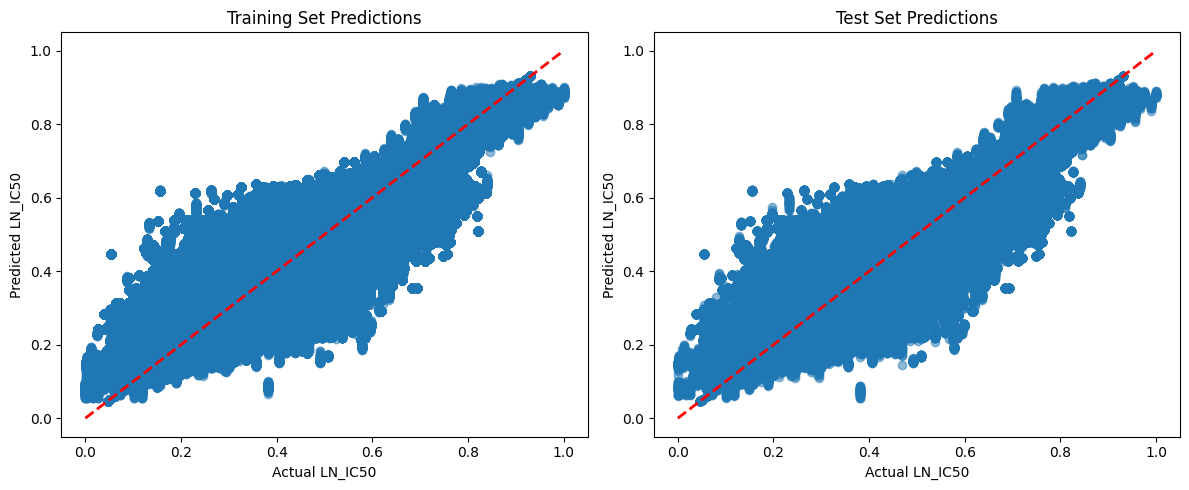

Model saved successfully

Model Performance Metrics:
train_mse: 0.0030
test_mse: 0.0030
train_r2: 0.8024
test_r2: 0.7998
model saved successfully


In [21]:
def main() -> None:
    # Load and normalize data
    print("data loading...")
    X, y = load_and_normalize_data(
        os.path.join(base_path, 'x.csv'),
        os.path.join(base_path, 'y.csv')
    )

    # Split data
    print("data spliting...")
    X_train, X_test, y_train, y_test = split_data(X, y)
    print(f"---X_train shape: {X_train.shape}")
    print(f"---X_test shape: {X_test.shape}")

    # Create and train model
    print("***Stast model training...")

    # 要另外調整參數的話可以用這個:
    '''
      model_params = {
        objective = 'reg:squarederror',
        n_estimators = 100,
        learning_rate = 0.1,
        max_depth = 6,
        random_state = 42
    }

    model = create_xgb_model(**model_params)
    '''

    # model = create_xgb_model()
    model = create_rf_model()
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    model.fit(X_train, y_train)
    print("model trained successfully")
    print(f"----Cross-Validation R2 Scores: {scores}")
    print(f"----Average R2 Score: {scores.mean()}")

    # 預測與評估
    print("model evaluating...")
    metrics = model_predict(model, X_train, X_test, y_train, y_test)
    print("model evaluated successfully")
    print("\n---Model Performance Metrics:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"{metric}: {value:.4f}")

    # Plot results
    plot_predictions(y_train, y_test, metrics['y_train_pred'], metrics['y_test_pred'])

    # Save model and results
    save_model(
        model,
        metrics,
        os.path.join(base_path, 'xgb_model.joblib'),
    )
    print("model saved successfully")

if __name__ == "__main__":
    main()

## (預留) 如果要使用到 saved model

In [ ]:
# def load_saved_model(model_path: str, scaler_path: str):
#     """
#     載入已儲存的模型和scaler

#     Args:
#         model_path: 模型檔案路徑
#         scaler_path: scaler檔案路徑
#     """
#     # 載入模型和scaler
#     model = joblib.load(model_path)
#     scaler = joblib.load(scaler_path)
#     return model, scaler

In [ ]:
# def make_predictions(model, scaler, new_data: pd.DataFrame):
#     """
#     使用載入的模型進行預測

#     Args:
#         model: 載入的SVR模型
#         scaler: 載入的StandardScaler
#         new_data: 要預測的新數據
#     """
#     # 使用相同的scaler轉換新數據
#     scaled_data = scaler.transform(new_data)

#     # 使用模型進行預測
#     predictions = model.predict(scaled_data)
#     return predictions

In [ ]:
# def main():
#     # 1. 載入模型和scaler
#     model, scaler = load_saved_model(
#         f'{save_model_path}/svm_model.joblib',
#         f'{save_model_path}/scaler.joblib'
#     )

#     # 2. 準備新數據 (這裡要確保新數據的格式和訓練時相同)
#     new_data = pd.read_csv(f'{base_path}/new_data.csv')  # 替換成你的新數據路徑

#     # 3. 進行預測
#     predictions = make_predictions(model, scaler, new_data)

#     # 4. 查看預測結果
#     print("Predictions:", predictions)

#     # 5. 如果需要，可以將預測結果保存到CSV
#     results_df = pd.DataFrame({
#         'Predictions': predictions
#     })
#     results_df.to_csv('predictions.csv', index=False)

# if __name__ == "__main__":
#     main()